In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df_clean = df.copy()
columns_to_drop = [
    'Make', 
    'Model',
    'Fuel Consumption Comb (mpg)',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)'
]

df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns], inplace=True)


In [5]:
simplified_vehicle_class = {
    'COMPACT': 'Sedan',
    'MINICOMPACT': 'Sedan',
    'MID-SIZE': 'Sedan',
    'FULL-SIZE': 'Sedan',
    'SUBCOMPACT': 'Sedan',
    'VAN - CARGO': 'Van',
    'VAN - PASSENGER': 'Van',
    'MINIVAN': 'Van',
    'SUV - SMALL': 'SUV',
    'SUV - STANDARD': 'SUV',
    'STATION WAGON - SMALL': 'Wagon',
    'STATION WAGON - MID-SIZE': 'Wagon', 
    'PICKUP TRUCK - STANDARD':'Pickup', 
	'PICKUP TRUCK - SMALL': 'Pickup',
    'TWO-SEATER': 'TWO-SEATER',
    'SPECIAL PURPOSE VEHICLE': 'Others',
}
df_clean['Vehicle Class'] = df_clean['Vehicle Class'].replace(simplified_vehicle_class)


In [6]:
def simplify_transmission(trans):
    if trans.startswith('M'):
        return 'Manual'
    else:
        return 'Automatic'
        
df_clean['Transmission'] = df_clean['Transmission'].apply(simplify_transmission)



In [7]:
fuel_map = {
    'X': 'Regular gasoline',
    'Z': 'Premium gasoline',
    'D': 'Diesel',
    'E': 'Ethanol',
    'N': 'Natural gas'
}
df_clean['Fuel Type'] = df_clean['Fuel Type'].replace(fuel_map)

In [8]:
categorical_cols = ['Fuel Type', 'Transmission', 'Vehicle Class']
df_clean = pd.get_dummies(df_clean, columns=categorical_cols)

In [9]:
X = df_clean.drop(columns=['CO2 Emissions(g/km)'])
y = df_clean['CO2 Emissions(g/km)']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolutue error",mean_absolute_error(y_test, y_pred))

R² Score: 0.9907760994892353
RMSE: 5.6326531107247035
Mean absolutue error 3.131679739314833


In [13]:
model.coef_

array([ 5.78327666e-02,  7.90512185e-01,  2.22796496e+01,  5.04049951e+01,
       -9.22954055e+01, -3.19744231e-14,  2.11853341e+01,  2.07050764e+01,
        1.29733821e-01, -1.29733821e-01,  3.87844915e+00,  1.92512781e+00,
        6.88709070e-01, -3.40715836e-01, -1.57161343e-01, -5.21582652e+00,
       -7.78582338e-01])

In [14]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})


coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)


print(coef_df_sorted)


                             Feature   Coefficient
4                  Fuel Type_Ethanol -9.229541e+01
3                   Fuel Type_Diesel  5.040500e+01
2   Fuel Consumption Comb (L/100 km)  2.227965e+01
6         Fuel Type_Premium gasoline  2.118533e+01
7         Fuel Type_Regular gasoline  2.070508e+01
15                 Vehicle Class_Van -5.215827e+00
10              Vehicle Class_Others  3.878449e+00
11              Vehicle Class_Pickup  1.925128e+00
1                          Cylinders  7.905122e-01
16               Vehicle Class_Wagon -7.785823e-01
12                 Vehicle Class_SUV  6.887091e-01
13               Vehicle Class_Sedan -3.407158e-01
14          Vehicle Class_TWO-SEATER -1.571613e-01
9                Transmission_Manual -1.297338e-01
8             Transmission_Automatic  1.297338e-01
0                     Engine Size(L)  5.783277e-02
5              Fuel Type_Natural gas -3.197442e-14


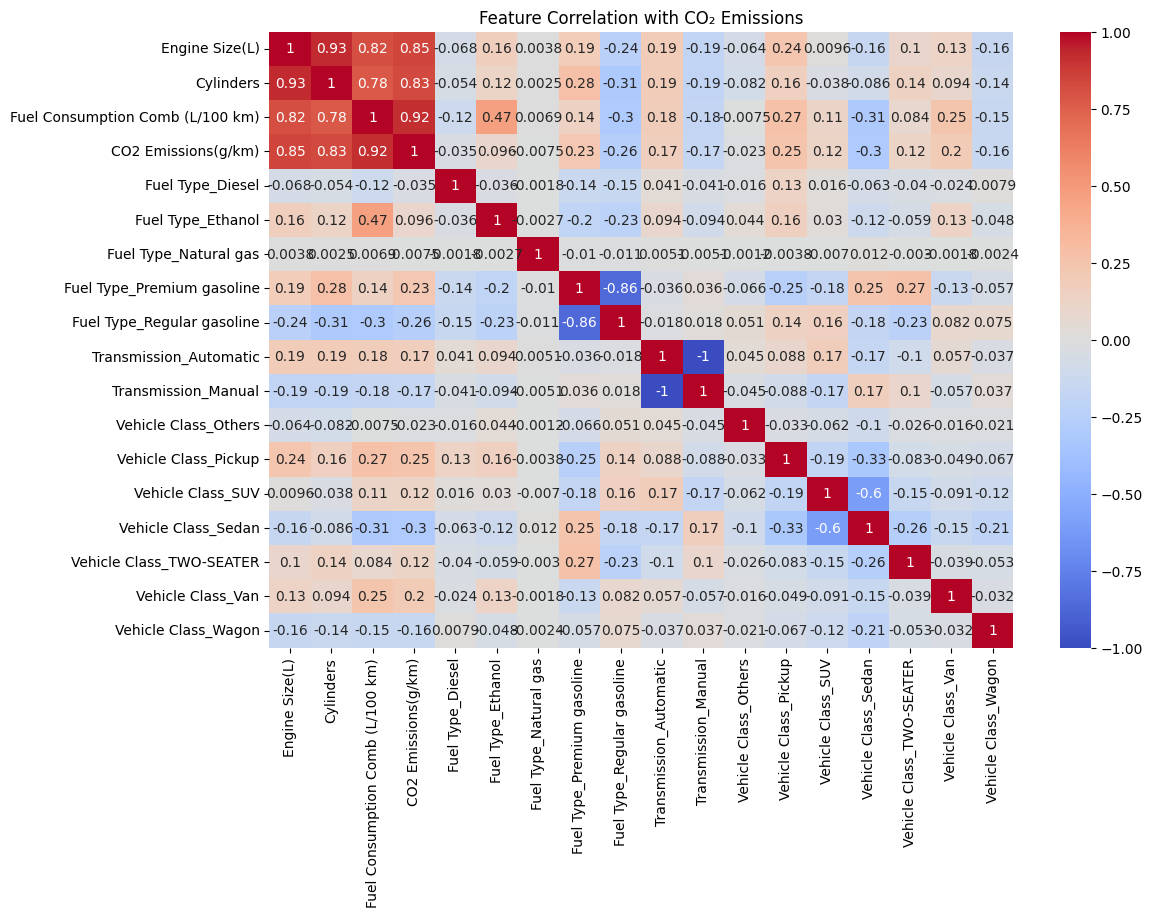

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with CO₂ Emissions")
plt.show()

In [32]:
error = y_pred - y_test

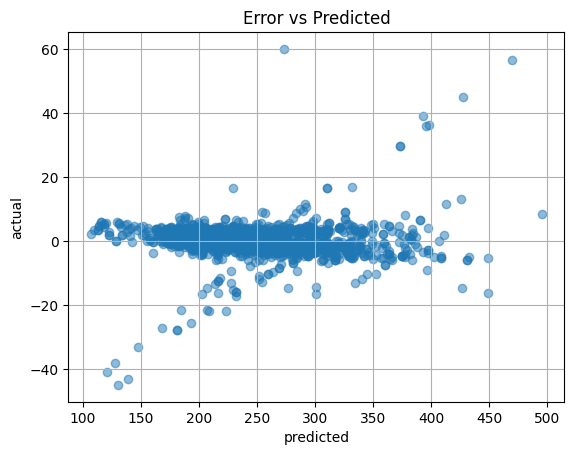

In [31]:
plt.title('Error vs Predicted')
plt.scatter(y_pred, error, alpha=0.5)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.grid(True)
plt.show()

In [33]:
import pandas as pd

# Single vehicle input
vehicle_spec = {
    'Engine Size(L)': 2.0,
    'Cylinders': 4,
    'Fuel Consumption Comb (L/100 km)': 8.5,
    'Fuel Type_Diesel': 0,
    'Fuel Type_Ethanol': 0,
    'Fuel Type_Natural gas': 0,
    'Fuel Type_Premium gasoline': 1,
    'Fuel Type_Regular gasoline': 0,
    'Transmission_Automatic': 1,
    'Transmission_Manual': 0,
    'Vehicle Class_Others': 0,
    'Vehicle Class_Pickup': 0,
    'Vehicle Class_SUV': 1,
    'Vehicle Class_Sedan': 0,
    'Vehicle Class_TWO-SEATER': 0,
    'Vehicle Class_Van': 0,
    'Vehicle Class_Wagon': 0
}

# Convert to DataFrame
single_input = pd.DataFrame([vehicle_spec])

# Reorder to match training data
single_input = single_input[X_train.columns]

# Predict
prediction = model.predict(single_input)
print(f"Predicted CO₂ Emission: {prediction[0]:.2f} g/km")

Predicted CO₂ Emission: 200.00 g/km
